In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [87]:
class TrigonometricLorenz:
    def __init__(self, alpha: float, amplitude: float, period: float):
        self.alpha = alpha
        self.amplitude = amplitude
        self.period = period

    def derivative(self, x: np.ndarray):
        return np.array([
            10 * (np.sin(x[1]) - np.sin(x[0])) * self.amplitude,
            28 * np.sin(x[0]) * self.amplitude - 2 * self.alpha * np.sin(x[0]) * np.sin(x[2]) * self.amplitude**2 - np.sin(x[1]) * self.amplitude,
            self.alpha / 2 * np.sin(x[0]) * np.sin(x[1]) * self.amplitude**2 - 8 / 3 * np.sin(x[2]) * self.amplitude
        ])
    
    def sub_func(self, v: float):
        return np.sin(v * 2 * np.pi / self.period)

    def derivative2(self, x: np.ndarray):
        return np.array([
            10 * (self.sub_func(x[1]) - self.sub_func(x[0])),
            28 * self.sub_func(x[0]) - 2 * self.alpha * self.sub_func(x[0]) * self.sub_func(x[2]) - self.sub_func(x[1]),
            self.alpha / 2 * self.sub_func(x[0]) * self.sub_func(x[1]) - 8 / 3 * self.sub_func(x[2])
        ])

  0%|          | 0/20 [00:00<?, ?it/s]

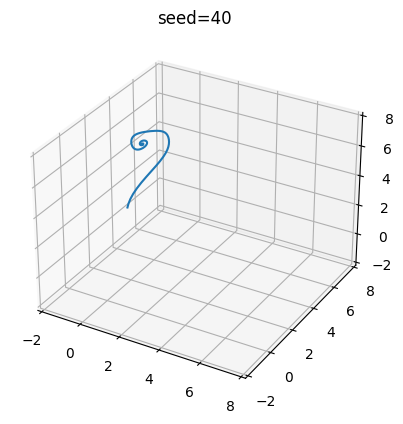

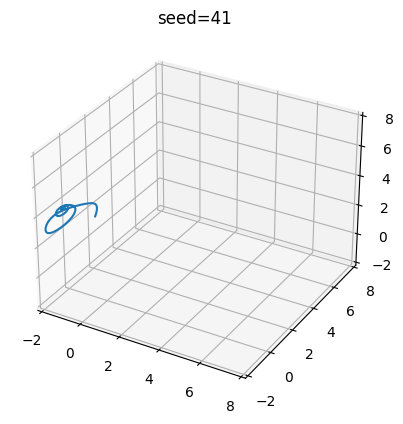

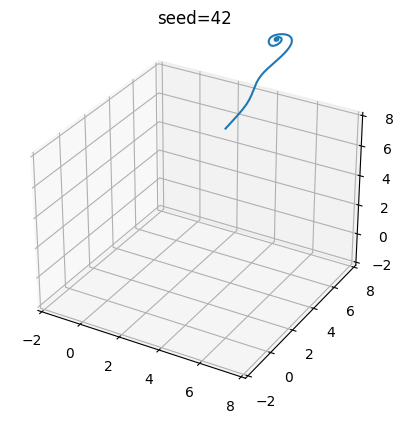

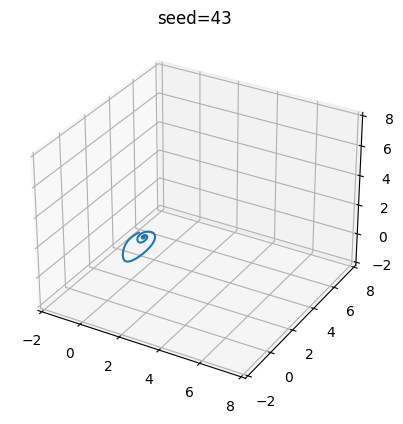

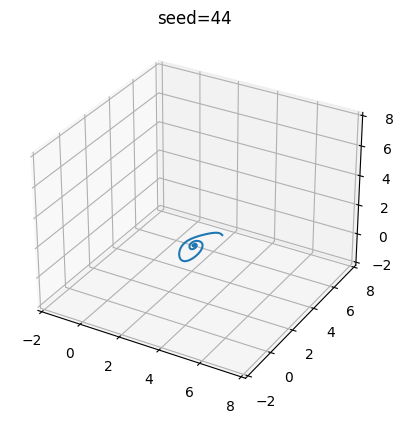

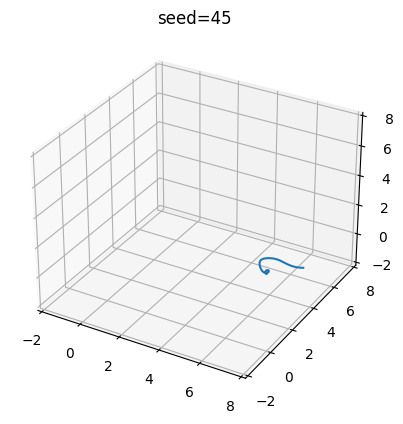

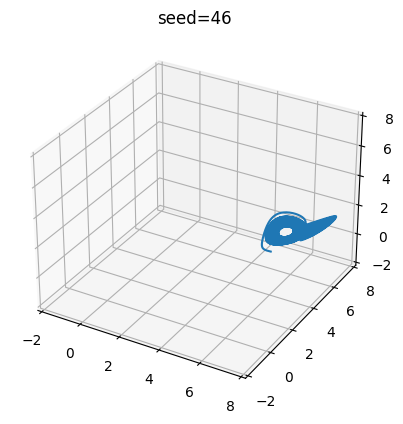

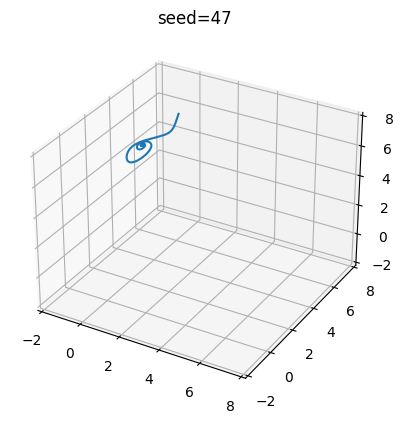

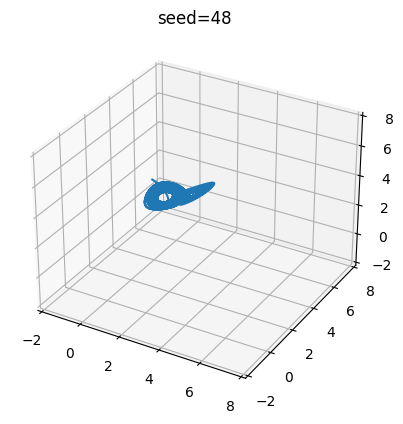

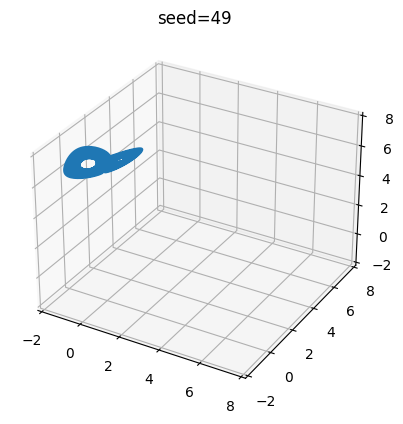

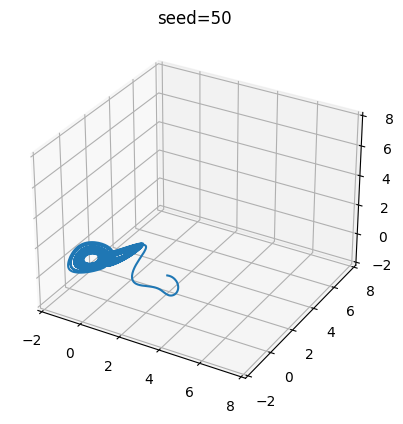

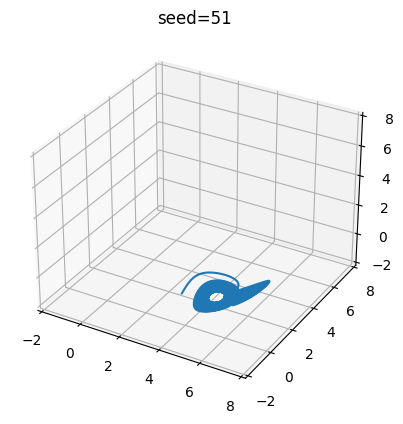

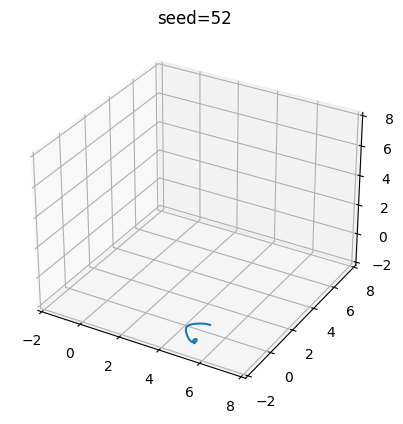

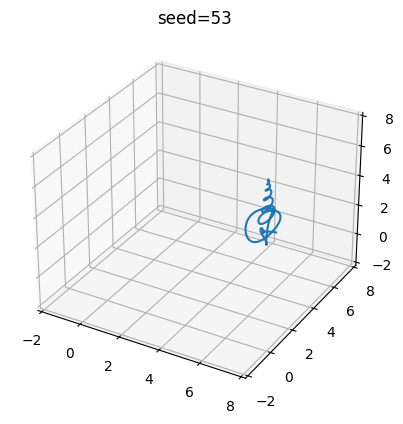

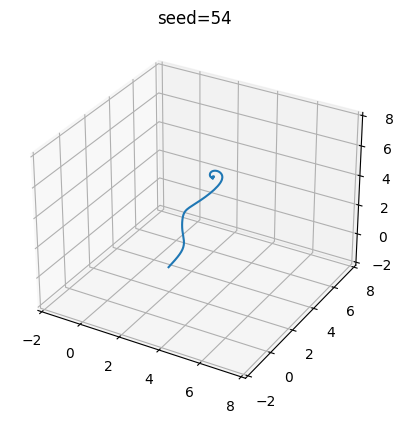

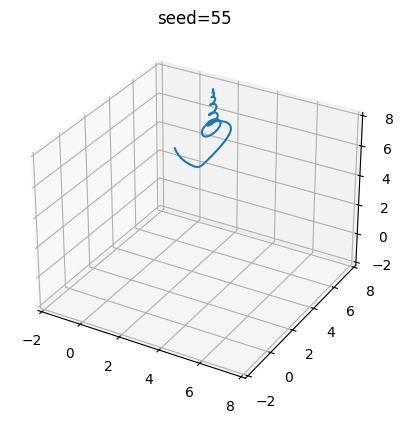

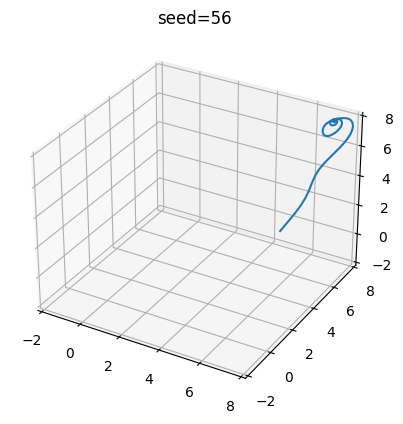

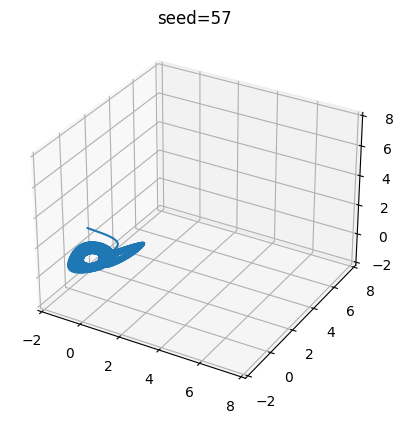

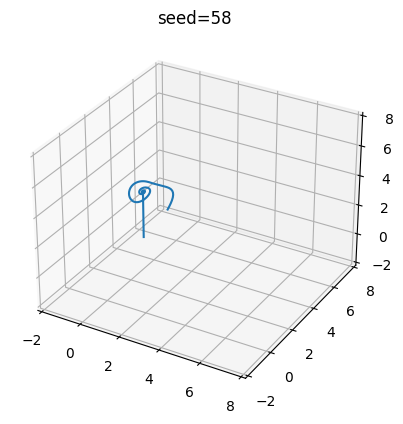

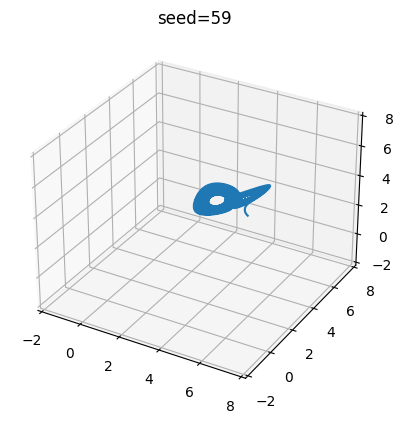

In [46]:
start = 40
for seed in tqdm(np.arange(start, start + 20)):

    np.random.seed(seed)
    x = np.random.rand(3) * 10 - 2
    t = TrigonometricLorenz(alpha=19, amplitude=1)
    dt = 0.01

    states = []
    for i in range(10000):
        states.append(x.copy())
        x += t.derivative(x) * dt
        # print(x)

    states = np.array(states)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(states[:, 0], states[:, 1], states[:, 2])
    ax.set_xlim(-2, 8)
    ax.set_ylim(-2, 8)
    ax.set_zlim(-2, 8)
    plt.title(f"seed={seed}")
    plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

Text(0.5, 0.92, 'amplitude=1')

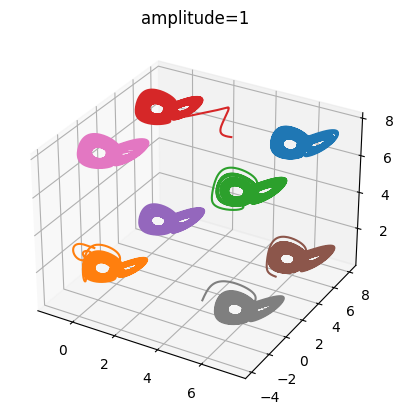

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
amplitude = 1

selectSeeds = [8, 11, 13, 14, 19, 46, 49, 51]

for seed in tqdm(selectSeeds):

    np.random.seed(seed)
    x = np.random.rand(3) * 10 - 2
    t = TrigonometricLorenz(alpha=19, amplitude=amplitude, period=2 * np.pi)
    dt = 0.01

    states = []
    for i in range(10000):
        states.append(x.copy())
        x += t.derivative(x) * dt

    states = np.array(states)

    ax.plot(states[:, 0], states[:, 1], states[:, 2])

plt.title(f"amplitude={amplitude}")

  0%|          | 0/8 [00:00<?, ?it/s]

Text(0.5, 0.92, 'amplitude=1, period=1000.00')

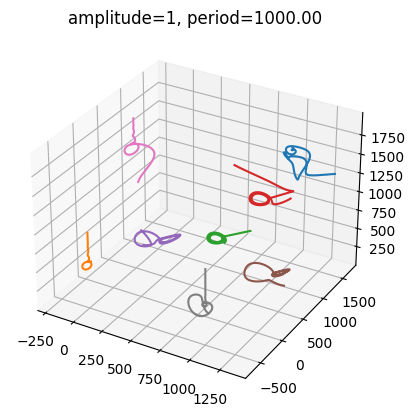

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
amplitude = 1
period = 1000

selectSeeds = [8, 11, 13, 14, 19, 46, 49, 51]

for seed in tqdm(selectSeeds):

    np.random.seed(seed)
    # x = np.random.rand(3) * 10 - 2
    x = (np.random.rand(3) * 1000 - 200) * 2
    t = TrigonometricLorenz(alpha=19, amplitude=amplitude, period=period)
    dt = 0.01

    states = []
    for i in range(50000):
        states.append(x.copy())
        x += t.derivative2(x) * dt

    states = np.array(states)

    ax.plot(states[:, 0], states[:, 1], states[:, 2])

plt.title(f"amplitude={amplitude}, period={period:.2f}")